# Plotting and Visualization

In [7]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [8]:
%matplotlib inline

In [9]:
%pwd

'C:\\pydev\\pydata-book-master'

# Practice

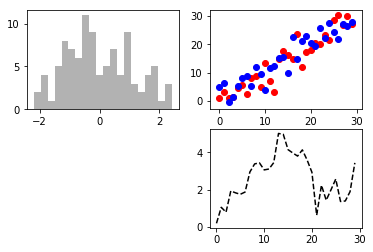

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)
plt.plot(randn(30).cumsum(),'k--');
ax1.hist(randn(100), bins=20, color='k', alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30), color='r');
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30), color='b');

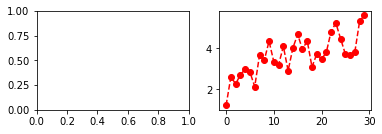

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
plt.plot(np.random.randn(30).cumsum(),'ro--');


In [33]:
import matplotlib

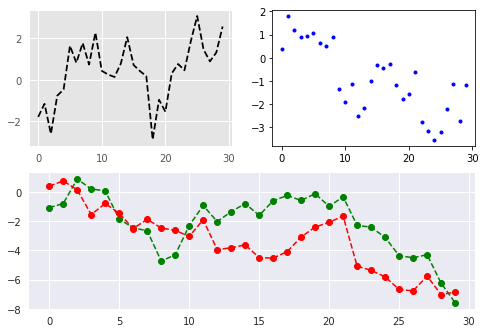

In [39]:
matplotlib.style.use("ggplot")
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(np.random.randn(30).cumsum(),'k--');
matplotlib.style.use('seaborn')
ax3 = fig.add_subplot(2,1,2)
matplotlib.style.use('default')
ax3.plot(np.random.randn(30).cumsum(), 'go--')
ax2 = fig.add_subplot(222)
ax2.plot(np.random.randn(30).cumsum(),'b.')
ax3.plot(np.random.randn(30).cumsum(), 'ro--')

## A brief matplotlib API primer

In [40]:
import matplotlib.pyplot as plt

### Figures and Subplots

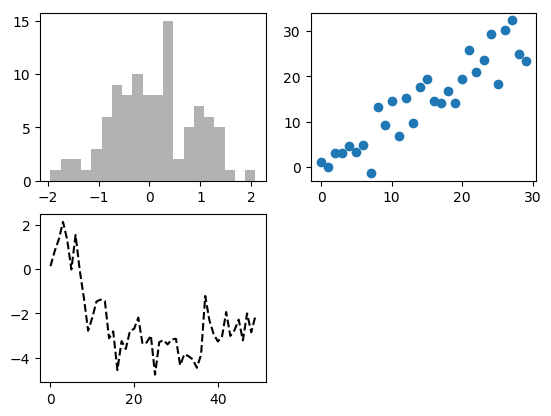

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

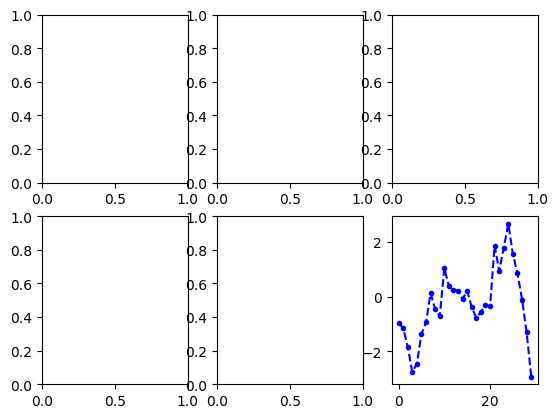

In [48]:
fig, axes = plt.subplots(2, 3);
axes
axes[1,2].plot(np.random.randn(30).cumsum(), 'b.--')

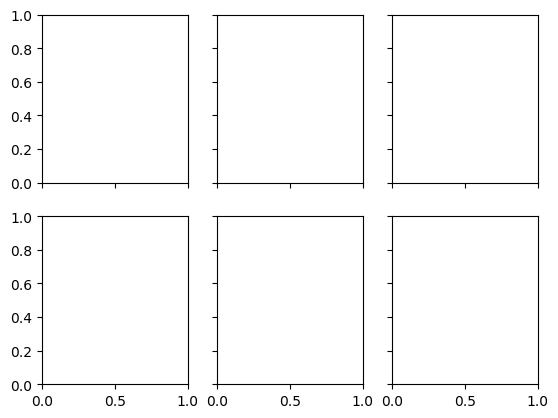

In [51]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True);
# 같은 크기로 맞춰서 통일감을 준다. 

#### Adjusting the spacing around subplots

In [52]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

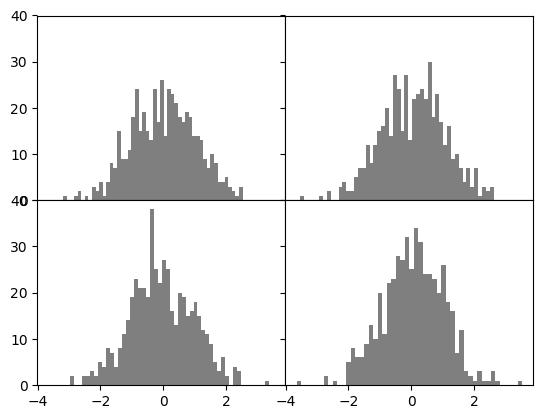

In [53]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

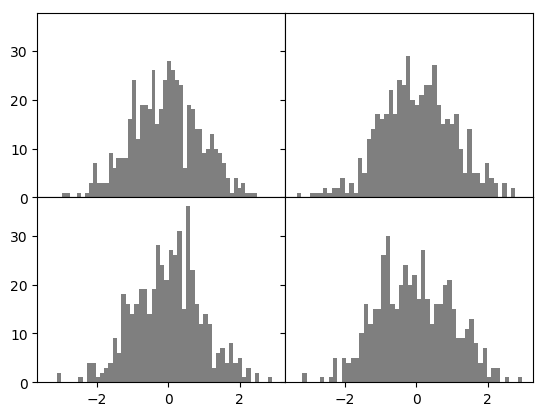

In [54]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

In [55]:
plt.figure()

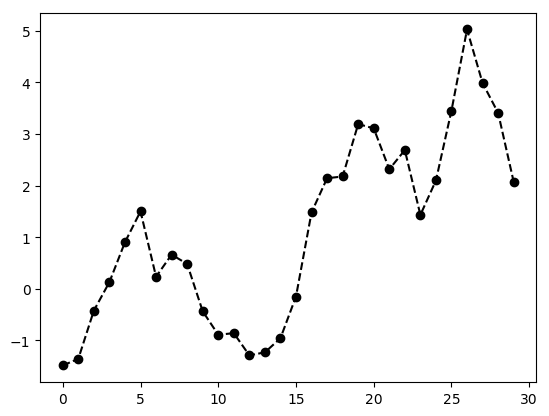

In [56]:
plt.plot(randn(30).cumsum(), 'ko--')

In [57]:
plt.close('all')

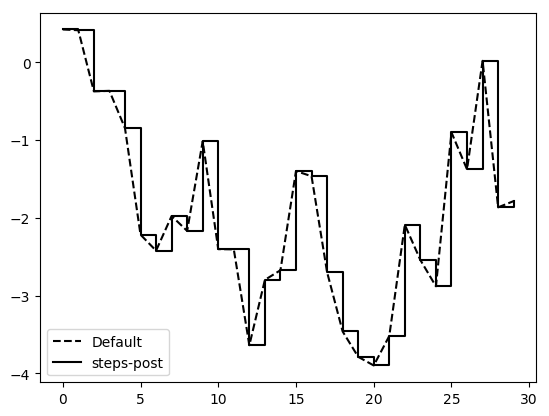

In [58]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

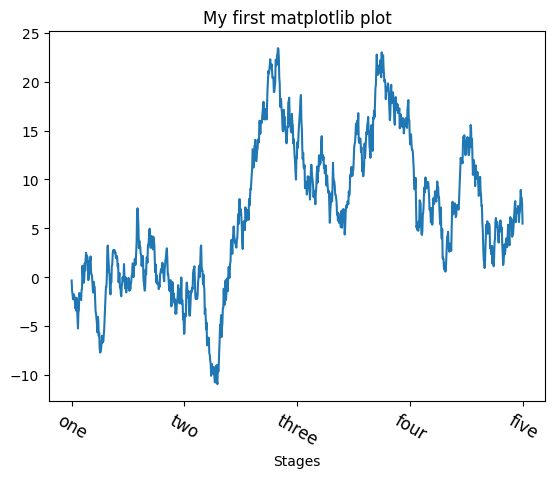

In [65]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1) # 명시적으로 subplot 지정!
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # x축 눈금을 잡네.
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=-30, fontsize='large')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

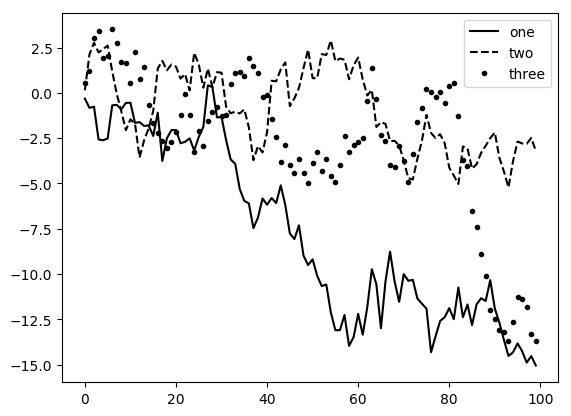

In [68]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(100).cumsum(), 'k', label='one')
ax.plot(randn(100).cumsum(), 'k--', label='two')
ax.plot(randn(100).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot
- 그림위에 그림이나 글자를 추가함!! 

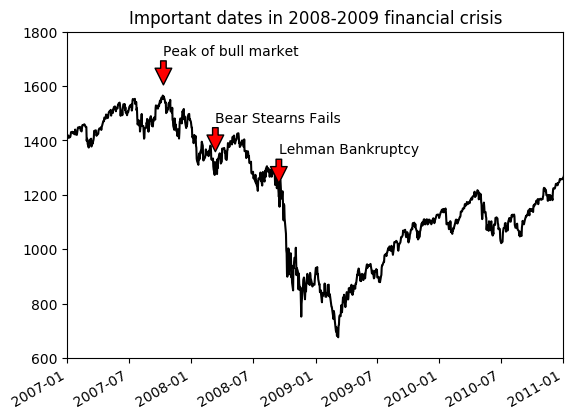

In [74]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-') # pandas의 plot 함수를 쓴거다. ax를 주의! 

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

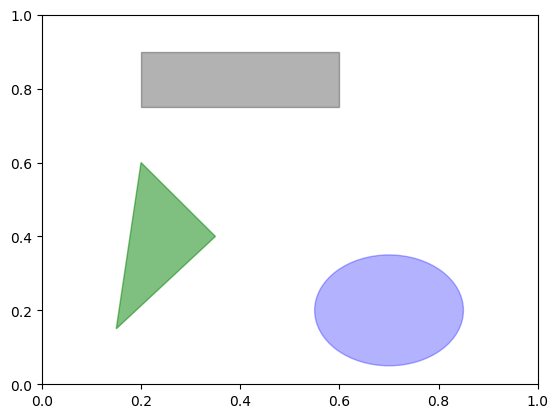

In [76]:
# 도형을 그리고 싶을 때가 있다!! 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) # 폭, 높이를 주네! 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) # 원점을 잡아주네!! 
# 왜 타원이지?! 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# patch 명령어를 토애서 붙여준다!! 

### Saving plots to file

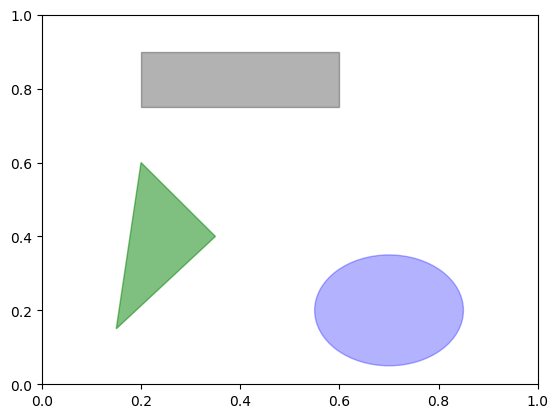

In [77]:
fig

In [78]:
fig.savefig('figpath.svg') 

In [79]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight') # png는 투명배경 설정해 줄 수 있다.

In [80]:
# binary 데이터로 저장하겠다!!! 
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [96]:
plt.rc('figure', figsize=(10, 10)) # rc 설정하겠다는 거다. resource configuration
# default size: (6,4)
# plt.rc('figure', figsize=(6,4))

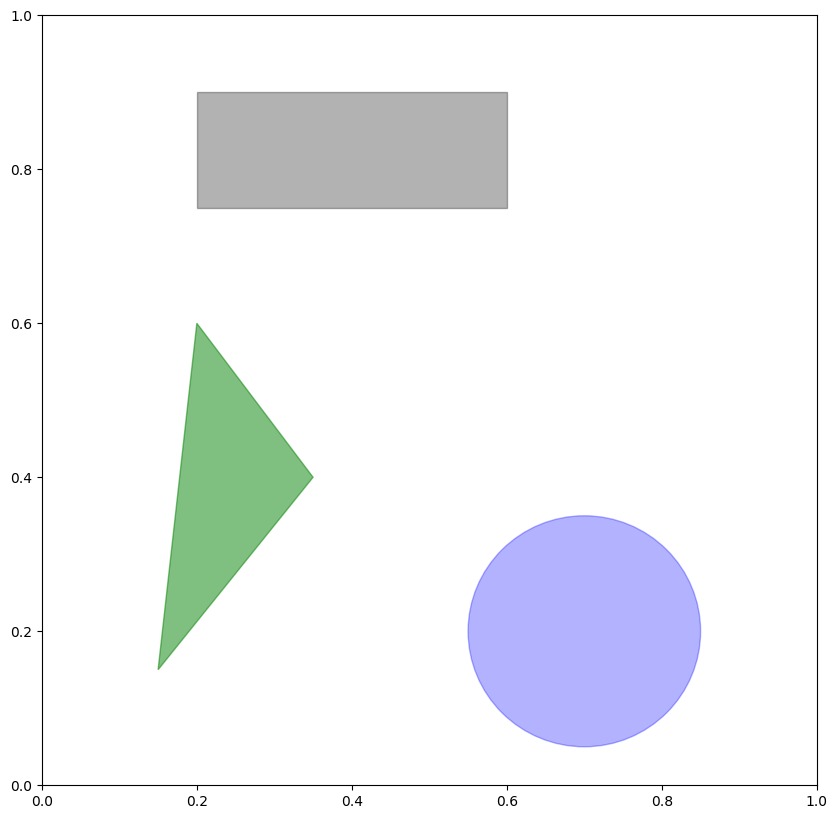

In [87]:
# 도형을 그리고 싶을 때가 있다!! 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# rc 셋팅해서 그림 크기를 지정했다!! 


In [91]:
font_options={
    'family': 'monospace',
    'weight':'bold',
    'size':'15',
}
plt.rc('font',**font_options)
#위를 해석하면
# plt.rc('font',family='monospace',weight='bold',size=11)

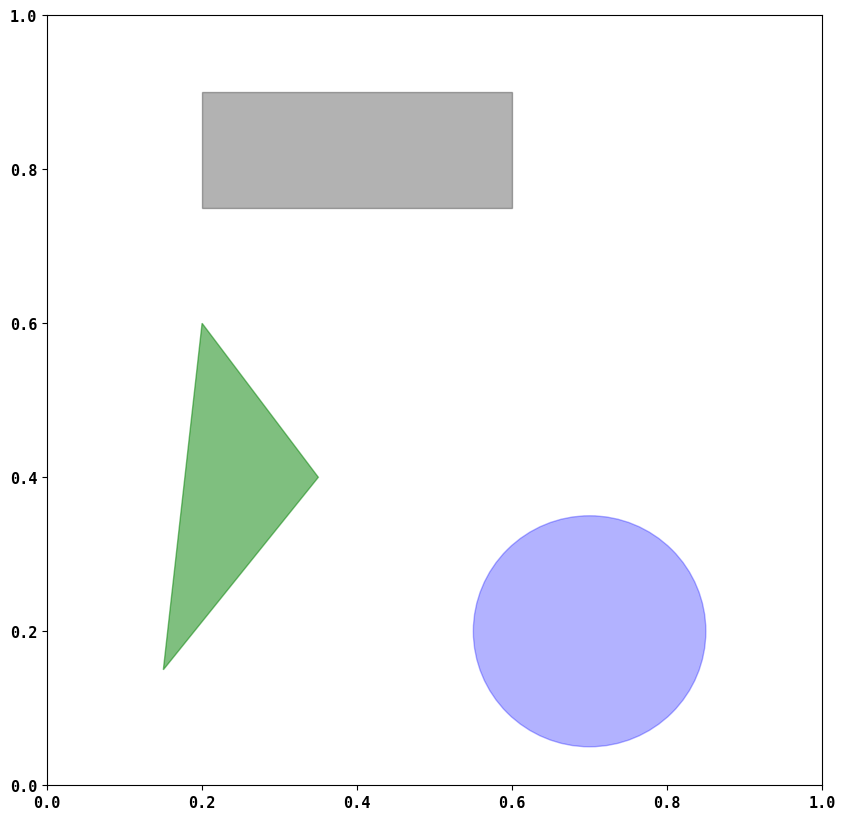

In [92]:
# 도형을 그리고 싶을 때가 있다!! 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# rc 셋팅으로 글자 설정 변한 것을 알 수 있다.

## Plotting functions in pandas

### Line plots

In [93]:
plt.close('all')

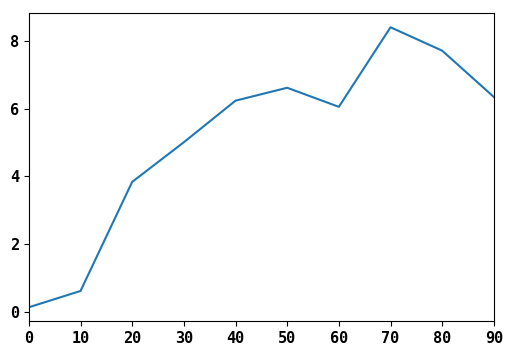

In [97]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

[[-0.2372  0.5521 -0.2349  0.3374]
 [-0.755  -0.9399  1.2649  0.1777]
 [ 0.927  -0.3926 -0.0674 -0.8127]
 [-1.578   0.0961  1.536   0.3791]
 [ 0.6369 -0.3323  0.7897  1.2068]
 [-0.3635 -0.1589  0.5512 -1.3682]
 [ 0.2312  1.7382  1.0138 -0.9151]
 [ 2.7422  0.8744  1.9758 -1.3135]
 [ 1.4589 -0.3601 -1.1302 -0.6778]
 [ 0.0101 -0.9559 -0.8373  0.6496]]
[[-0.3954 -0.9619  0.6249  0.4109]
 [-0.1645 -1.2607  0.9183 -0.3485]
 [-0.2355 -1.0027  0.278  -0.0446]
 [ 0.7729 -2.1477  0.623   0.5724]
 [ 1.2131 -0.9635  2.1237  2.008 ]
 [ 0.8462 -0.6255  1.9345  2.8392]
 [ 1.6133 -0.6684  2.0302  2.0411]
 [ 2.6366  0.8122  2.6117  2.2802]
 [ 3.8859 -0.6436  2.1731  2.1034]
 [ 2.3278 -0.7778  2.4997  0.3298]]


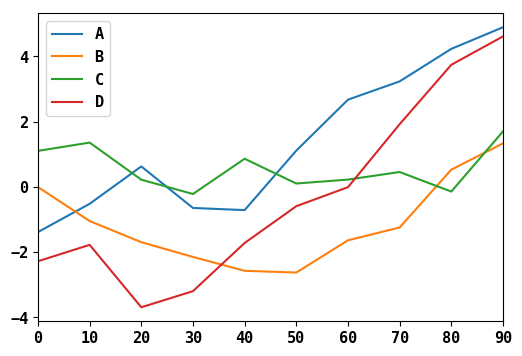

In [101]:
print(np.random.randn(10,4))
print(np.random.randn(10, 4).cumsum(0))
df = DataFrame(np.random.randn(10, 4).cumsum(0), # 축이 0번축 행들의 집합 세로로 cumsum하지!! 열들마다 계산됨!! 
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

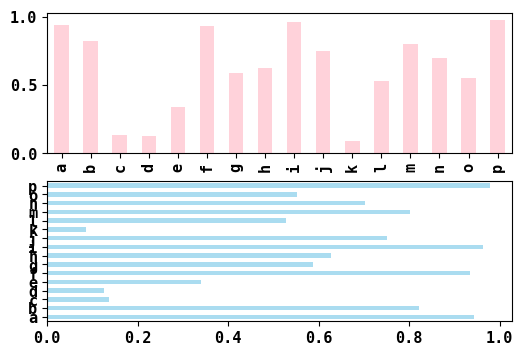

In [107]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='pink', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='skyblue', alpha=0.7)

[[ 0.6325  0.1882  0.2919  0.0942]
 [ 0.0086  0.4026  0.6319  0.8113]
 [ 0.2696  0.058   0.0788  0.801 ]
 [ 0.4408  0.2918  0.4004  0.934 ]
 [ 0.3685  0.3059  0.8261  0.6781]
 [ 0.1174  0.6657  0.1991  0.9369]]


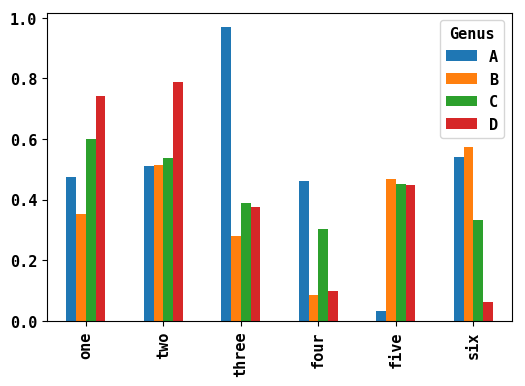

In [110]:
print(np.random.rand(6, 4))
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [ ]:
plt.figure()

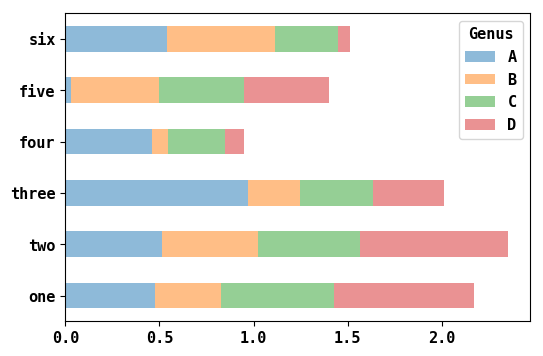

In [111]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [124]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips['size']) # tips.size 이렇게 하면 안된다. 이렇게 쓰면 tips 데이터 frame의 속성값을 출력하기 때문에!!!
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

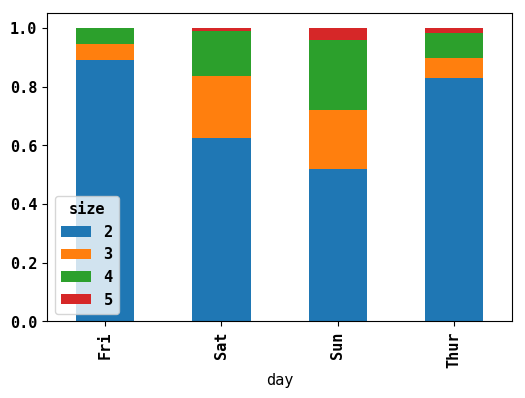

In [125]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [ ]:
plt.figure()

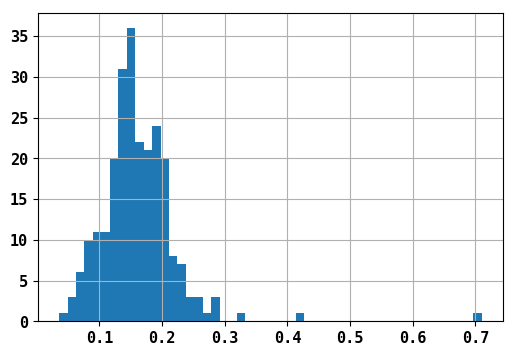

In [126]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [ ]:
plt.figure()

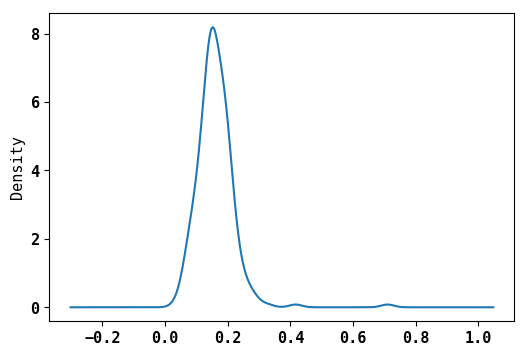

In [127]:
tips['tip_pct'].plot(kind='kde') # 연속확률 분포 그린다! 

In [ ]:
plt.figure()

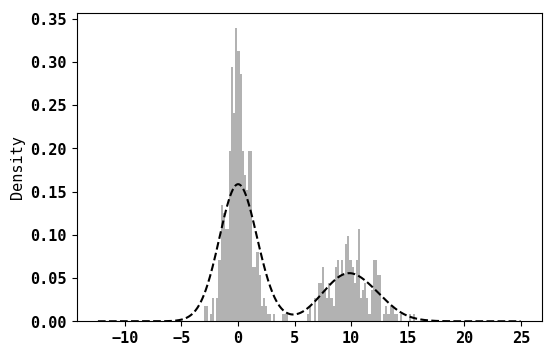

In [134]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

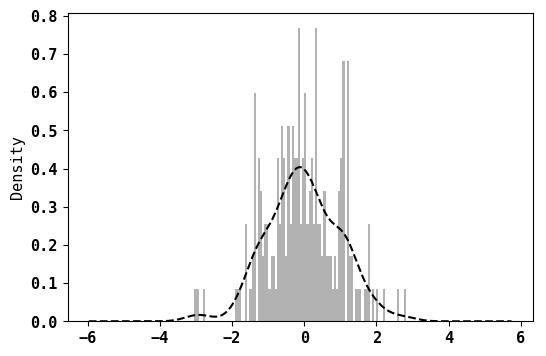

In [136]:
comp3 = (comp2-10)/2
values = Series(np.concatenate([comp3]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [137]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [138]:
plt.figure()

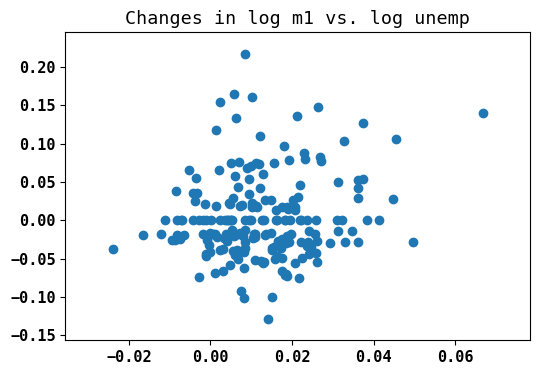

In [139]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

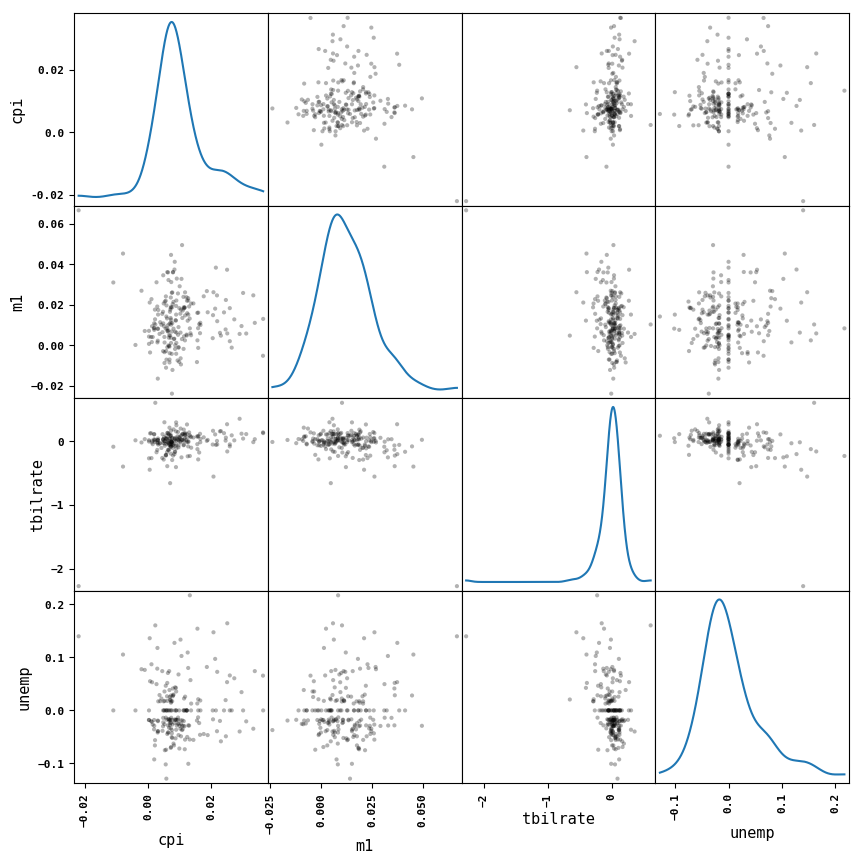

In [145]:
plt.rc('figure', figsize=(10,10))
#pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
plt.rc('figure', figsize=(6,4))

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [10]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [11]:
data.shape

(3593, 10)

In [12]:
data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [13]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10] # 컬럼을 먼저 뽑고 그중에 10건을 보겠다!! 

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [14]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [15]:
data.describe() # 기술통계들을 보여준다!! 

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [16]:
print(data.shape)
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & # 위도, 북위 18~20
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70) # 경도, 서경 75~70
            & data.CATEGORY.notnull()]
print(data.shape)
# 저건에 맞게 추렸다!! 

(3593, 10)
(3569, 10)


In [17]:
data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [18]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x] # x값이 있으면 반환.
                                      # list comprehension

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series) # generator expression, 메모리에 만들지는 않고 준비만 해둠!! 
    return sorted(set.union(*cat_sets)) # 이부분에서 인자로 cat_sets가 지정되었을 때 만들어 내는 거다!! 
    # cat_series는 sequence다!! 여기서 하나씩 x로 가지!! category의 값들이 들어간다!! 
    # 이 x들이 to_cat_list로 들어가지! ","로 split 하게된다. 
    # 후 set으로 unique 하지. stripped로 지정 
    # cat_sets : g.e 집합이 여러개 들어가 있는 generators다!! 그 집합들을 하나의 집합으로 
    # 만들고 sorted 해준다!! 

def get_english(cat):
    code, names = cat.split('.') # 점을 기준으로 앞뒤로 code, names로 나눈다!!
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

# category 구분을 하기위한 함수들을 만들었다!! 

In [19]:
data.CATEGORY.head(5)

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [20]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [21]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
print(english_mapping['2a'])
print(english_mapping['6c'])

Food Shortage
Earthquake and aftershocks


In [22]:
len(all_cats)

47

In [23]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
print(all_codes[:5])
code_index = pd.Index(np.unique(all_codes))
print(code_index[:5])
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
data.index[:5]
print(dummy_frame[:5])

['1', '1a', '1b', '1c', '1d']
Index(['1', '1a', '1b', '1c', '1d'], dtype='object')
     1   1a   1b   1c   1d    2   2a   2b   2c   2d ...    7c   7d   7g   7h  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

     8   8a   8c   8d   8e   8f  
0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  
7  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 45 columns]


In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [25]:
len(all_codes)
len(np.unique(all_codes))
dummy_frame.info

47

45

<bound method DataFrame.info of         1   1a   1b   1c   1d    2   2a   2b   2c   2d ...    7c   7d   7g  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
6     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
7     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
8     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
9     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
12    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
13    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
14    0.0  0.0  0.0  0.0  0.0  0

In [26]:
dummy_frame[:5]

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [28]:
data.index[:5]
data.CATEGORY.head()

Int64Index([0, 4, 5, 6, 7], dtype='int64')

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [29]:
list(zip(data.index, data.CATEGORY))[:5]

[(0, '1. Urgences | Emergency, 3. Public Health, '),
 (4, '1. Urgences | Emergency, '),
 (5, '5e. Communication lines down, '),
 (6,
  '4. Menaces | Security Threats, 4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion, '),
 (7, '4. Menaces | Security Threats, ')]

In [30]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1 # iloc, loc 언제 쓰는지 구분 잘해라!! 
                                    # row codes 모두 label 이니!! 
                                    # 해당 되는 것에만 1 해줌!! 

In [31]:
data = data.join(dummy_frame.add_prefix('category_'))
data.head(5)
#

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


In [33]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,  # low left upper right 만 알면 그릴 수 있지!! 
                    lllon=-75, urlon=-71):              # haiti 쪽을 그릴 거기 때문에 default 값을 줌!! 
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f') # basemap에 관련된 option 값을 만들어줌!!
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

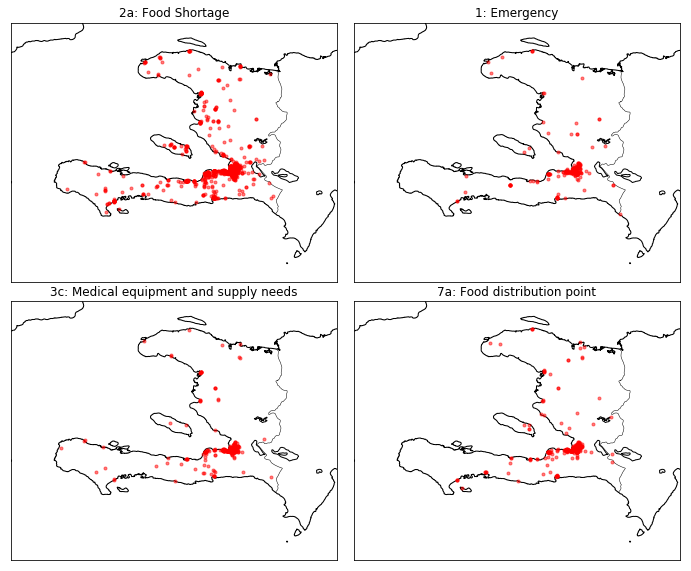

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) # 그림 크기 part 지정! 
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat): # axes가 list of list 여서 flat 해줌!! 
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'r.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [1]:
type(axes)

NameError: name 'axes' is not defined

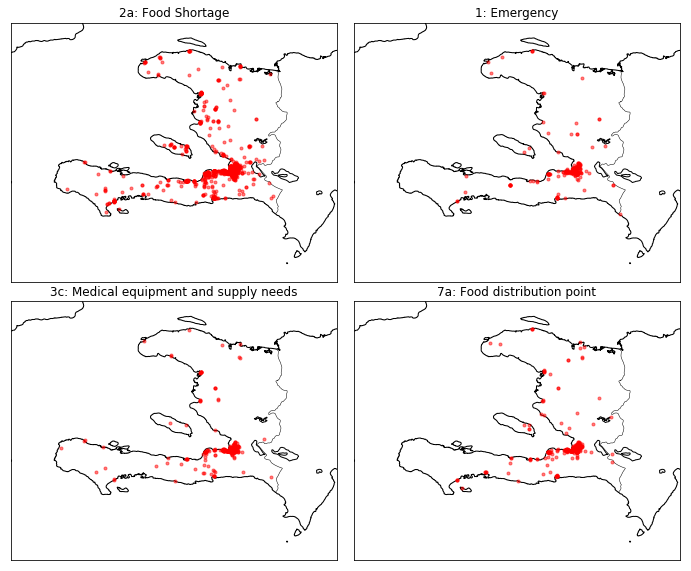

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1] # category_2a 이렇게 표시되지!! 
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'r.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        
make_plot()
     

- 위 전체를 py 파일로 만들어 다른 곳에서 import 할 수 있지!! 

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x9487e10>)

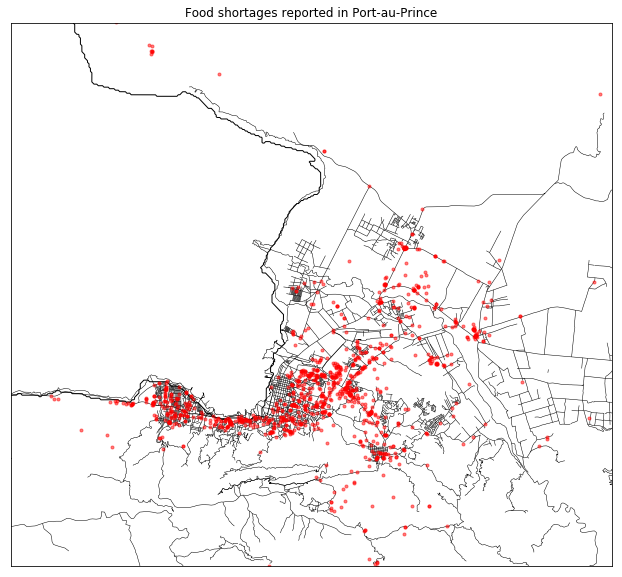

In [34]:
plt.rc('figure', figsize=(12, 10))
fig = plt.figure()
cat_data = data[data['category_2a'] == 1]
lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

m = basic_haiti_map(lllat=18.45, urlat=18.75, lllon=-72.5, urlon=-72.15)

shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')
x, y = m(lons.values, lats.values)

m.plot(x,y,'r.', alpha=0.5)
fig.get_axes()[0].set_title('Food shortages reported in Port-au-Prince')



### Mayavi 있다. 3차원 그래픽스
- interactive graph도 있다!! 
- 시각화 라이브러리와 애플리케이션은 PySqt, Veusz, gnuplot-py, biggles 등 무수히 많다.


- Mayayi 3차원 이미지 그려주는 사이트 http://docs.enthought.com/mayavi/mayavi/
- Chaco 정적그래프와 대화형 시각화 지원
- PySqt, Veusz, gnuplotpy, giggles, PyQwt
- D3.js